In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Data Pre-processing
df['Credit_History'] = df['Credit_History'].fillna(1.0).astype(int)

In [8]:
df['Dependents'] = df['Dependents'].fillna(0.0)

In [9]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [10]:
df['Self_Employed'] = df['Self_Employed'].fillna('Yes')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       614 non-null int32
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 40.8+ KB


In [12]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [13]:
df['Married'] = df['Married'].fillna('No')

In [14]:
# Let us assume that missing values would be replace by Female 
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
df['Gender'] = df['Gender'].fillna('Female')

In [16]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
128.0    11
113.0    11
130.0    10
96.0      9
95.0      9
70.0      8
115.0     8
112.0     8
150.0     7
135.0     7
136.0     7
132.0     7
125.0     7
104.0     7
80.0      6
81.0      6
138.0     6
90.0      6
158.0     6
116.0     6
175.0     6
144.0     6
155.0     6
180.0     6
152.0     5
         ..
315.0     1
101.0     1
73.0      1
142.0     1
48.0      1
164.0     1
83.0      1
191.0     1
166.0     1
495.0     1
59.0      1
214.0     1
240.0     1
72.0      1
42.0      1
349.0     1
280.0     1
405.0     1
279.0     1
304.0     1
650.0     1
436.0     1
78.0      1
54.0      1
89.0      1
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [17]:
df['LoanAmount'].mean()

146.41216216216216

In [18]:
df['LoanAmount'].isnull().value_counts()

False    592
True      22
Name: LoanAmount, dtype: int64

In [19]:
df['LoanAmount_log']= np.log(df['LoanAmount'])

In [20]:
df['LoanAmount_log'].mean()

4.857444178729353

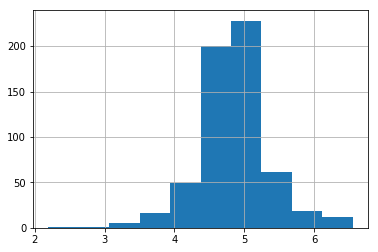

In [21]:
df['LoanAmount_log'].hist()

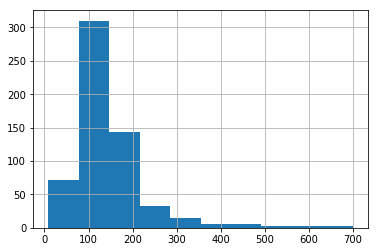

In [22]:
df['LoanAmount'].hist()

In [23]:
df['LoanAmount_log'] = df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean())

In [24]:
df['LoanAmount'] = df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean())

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       614 non-null int32
Property_Area        614 non-null object
Loan_Status          614 non-null object
LoanAmount_log       614 non-null float64
dtypes: float64(4), int32(1), int64(1), object(8)
memory usage: 45.6+ KB


In [26]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [27]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(0)

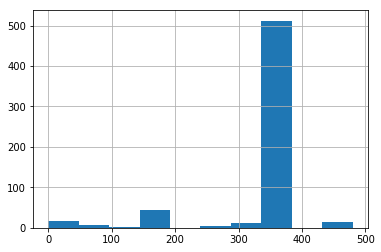

In [28]:
df['Loan_Amount_Term'].hist()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null int32
Property_Area        614 non-null object
Loan_Status          614 non-null object
LoanAmount_log       614 non-null float64
dtypes: float64(4), int32(1), int64(1), object(8)
memory usage: 45.6+ KB


In [30]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['LoanAmount'] = df['LoanAmount'].astype(int)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)
df['LoanAmount_log'] = df['LoanAmount_log'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null int32
LoanAmount           614 non-null int32
Loan_Amount_Term     614 non-null int32
Credit_History       614 non-null int32
Property_Area        614 non-null object
Loan_Status          614 non-null object
LoanAmount_log       614 non-null int32
dtypes: int32(5), int64(1), object(8)
memory usage: 36.0+ KB


In [32]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [33]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', 0.0], dtype=object)

In [34]:
df['Dependents'].replace(['3+'],'4',inplace=True)

In [35]:
df['Dependents'] = df['Dependents'].astype(int)

In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0,4,360,1,Urban,Y,4
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,4,360,1,Rural,N,4
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,4,360,1,Urban,Y,4
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,4,360,1,Urban,Y,4
4,LP001008,Male,No,0,Graduate,No,6000,0,4,360,1,Urban,Y,4


In [37]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [38]:
# Categorial Encoding
train = pd.get_dummies(df,columns=['Gender','Education','Married','Self_Employed','Dependents','Property_Area'],drop_first=True)
train.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Male,Education_Not Graduate,Married_Yes,Self_Employed_Yes,Dependents_1,Dependents_2,Dependents_4,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0,4,360,1,Y,4,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508,4,360,1,N,4,1,0,1,0,1,0,0,0,0
2,LP001005,3000,0,4,360,1,Y,4,1,0,1,1,0,0,0,0,1
3,LP001006,2583,2358,4,360,1,Y,4,1,1,1,0,0,0,0,0,1
4,LP001008,6000,0,4,360,1,Y,4,1,0,0,0,0,0,0,0,1


In [39]:
train.drop(columns=['Loan_ID'],axis=1,inplace=True)

In [40]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [41]:
train['Loan_Status'] = lb.fit_transform(train['Loan_Status'])

In [42]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Male,Education_Not Graduate,Married_Yes,Self_Employed_Yes,Dependents_1,Dependents_2,Dependents_4,Property_Area_Semiurban,Property_Area_Urban
0,5849,0,4,360,1,1,4,1,0,0,0,0,0,0,0,1
1,4583,1508,4,360,1,0,4,1,0,1,0,1,0,0,0,0
2,3000,0,4,360,1,1,4,1,0,1,1,0,0,0,0,1
3,2583,2358,4,360,1,1,4,1,1,1,0,0,0,0,0,1
4,6000,0,4,360,1,1,4,1,0,0,0,0,0,0,0,1


In [43]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [44]:
test.shape

(367, 12)

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 24.4+ KB


In [46]:
test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [47]:
test['Gender'] = test['Gender'].fillna('Female')

In [48]:
test['Dependents'] = test['Dependents'].fillna(0)

In [49]:
test['Self_Employed'] = test['Self_Employed'].fillna('No')

In [50]:
test['LoanAmount'] = test['LoanAmount'].fillna(0).astype(int)

In [51]:
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(0)

In [52]:
test['Credit_History'] = test['Credit_History'].fillna(0).astype(int)

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null int32
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null int32
Property_Area        367 non-null object
dtypes: float64(1), int32(2), int64(2), object(7)
memory usage: 21.5+ KB


In [54]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Gender_Male', 'Education_Not Graduate', 'Married_Yes',
       'Self_Employed_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_4',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [55]:
train.shape

(614, 16)

In [56]:
x = train.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,1,3,14,15]].values
y = train.iloc[:,5].values

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [59]:
x_train= sc.fit_transform(x_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [60]:
x_test= sc.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [61]:
# By using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [62]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
lr_pred = lr.predict(x_test)

In [64]:
lr_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [65]:
proba = lr.predict_proba(x_test)
proba

array([[0.13111293, 0.86888707],
       [0.14965251, 0.85034749],
       [0.27139731, 0.72860269],
       [0.19253377, 0.80746623],
       [0.09100078, 0.90899922],
       [0.96980515, 0.03019485],
       [0.21094061, 0.78905939],
       [0.22842779, 0.77157221],
       [0.89837789, 0.10162211],
       [0.12759162, 0.87240838],
       [0.15274684, 0.84725316],
       [0.1366686 , 0.8633314 ],
       [0.19426508, 0.80573492],
       [0.14178919, 0.85821081],
       [0.08705836, 0.91294164],
       [0.20951744, 0.79048256],
       [0.38419484, 0.61580516],
       [0.24280269, 0.75719731],
       [0.25101103, 0.74898897],
       [0.96929478, 0.03070522],
       [0.93454531, 0.06545469],
       [0.12150581, 0.87849419],
       [0.17331195, 0.82668805],
       [0.24310838, 0.75689162],
       [0.22561362, 0.77438638],
       [0.19337935, 0.80662065],
       [0.23724561, 0.76275439],
       [0.19039232, 0.80960768],
       [0.85773516, 0.14226484],
       [0.89172744, 0.10827256],
       [0.

In [66]:
proba_log = lr.predict_log_proba(x_test)
proba_log

array([[-2.03169627, -0.14054212],
       [-1.8994393 , -0.1621102 ],
       [-1.30417145, -0.3166267 ],
       [-1.64748374, -0.21385404],
       [-2.39688723, -0.09541104],
       [-0.0306601 , -3.50008388],
       [-1.55617865, -0.23691369],
       [-1.47653514, -0.25932501],
       [-0.10716449, -2.2864941 ],
       [-2.05892056, -0.13649764],
       [-1.87897338, -0.16575574],
       [-1.99019623, -0.14695666],
       [-1.63853165, -0.21600048],
       [-1.95341389, -0.15290551],
       [-2.44117652, -0.09108333],
       [-1.56294828, -0.23511169],
       [-0.95660546, -0.48482467],
       [-1.41550616, -0.27813141],
       [-1.38225842, -0.28903102],
       [-0.0311865 , -3.48332261],
       [-0.06769516, -2.7263972 ],
       [-2.10779319, -0.12954599],
       [-1.75266213, -0.19032786],
       [-1.41424794, -0.2785352 ],
       [-1.48893137, -0.25568434],
       [-1.64310146, -0.2149018 ],
       [-1.43865934, -0.2708192 ],
       [-1.65866847, -0.2112055 ],
       [-0.1534599 ,

In [67]:
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)

In [68]:
    print("confusion Metrix :\n",confusion_matrix(y_test,lr_pred))
    print("Accuracy Score :\n",accuracy_score(y_test,lr_pred))
    print("Precision Score:\n",precision_score(y_test,lr_pred))
    print("Recall score: \n",recall_score(y_test,lr_pred))
    print("F1 score: \n",f1_score(y_test,lr_pred))

confusion Metrix :
 [[ 20  23]
 [  2 109]]
Accuracy Score :
 0.8376623376623377
Precision Score:
 0.8257575757575758
Recall score: 
 0.9819819819819819
F1 score: 
 0.897119341563786


In [69]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [70]:
svm_pred = svm.predict(x_test)

In [71]:
    print("confusion Metrix :\n",confusion_matrix(y_test,svm_pred))
    print("Accuracy Score :\n",accuracy_score(y_test,svm_pred))
    print("Precision Score:\n",precision_score(y_test,svm_pred))
    print("Recall score: \n",recall_score(y_test,svm_pred))
    print("F1 score: \n",f1_score(y_test,svm_pred))

confusion Metrix :
 [[ 19  24]
 [  3 108]]
Accuracy Score :
 0.8246753246753247
Precision Score:
 0.8181818181818182
Recall score: 
 0.972972972972973
F1 score: 
 0.8888888888888891


In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
rf_pred = rf.predict(x_test) 

In [74]:
rf_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [75]:
print("confusion Metrix :\n",confusion_matrix(y_test,rf_pred))
print("Accuracy Score :\n",accuracy_score(y_test,rf_pred))
print("Precision Score:\n",precision_score(y_test,rf_pred))
print("Recall score: \n",recall_score(y_test,rf_pred))
print("F1 score: \n",f1_score(y_test,rf_pred))

confusion Metrix :
 [[25 18]
 [15 96]]
Accuracy Score :
 0.7857142857142857
Precision Score:
 0.8421052631578947
Recall score: 
 0.8648648648648649
F1 score: 
 0.8533333333333334


In [76]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
dt_pred = dt.predict(x_test)
dt_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [78]:
print("confusion Metrix :\n",confusion_matrix(y_test,dt_pred))
print("Accuracy Score :\n",accuracy_score(y_test,dt_pred))
print("Precision Score:\n",precision_score(y_test,dt_pred))
print("Recall score: \n",recall_score(y_test,dt_pred))
print("F1 score: \n",f1_score(y_test,dt_pred))

confusion Metrix :
 [[28 15]
 [38 73]]
Accuracy Score :
 0.6558441558441559
Precision Score:
 0.8295454545454546
Recall score: 
 0.6576576576576577
F1 score: 
 0.7336683417085428


In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [80]:
knn_pred = knn.predict(x_test)

In [81]:
print("confusion Metrix :\n",confusion_matrix(y_test,knn_pred))
print("Accuracy Score :\n",accuracy_score(y_test,knn_pred))
print("Precision Score:\n",precision_score(y_test,knn_pred))
print("Recall score: \n",recall_score(y_test,knn_pred))
print("F1 score: \n",f1_score(y_test,knn_pred))

confusion Metrix :
 [[ 20  23]
 [ 11 100]]
Accuracy Score :
 0.7792207792207793
Precision Score:
 0.8130081300813008
Recall score: 
 0.9009009009009009
F1 score: 
 0.8547008547008547


In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
parameters = {
    'n_estimators': [50,100,200,300,500],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [84]:
grid_search = GridSearchCV(estimator= rf, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)

In [85]:
grid_search= grid_search.fit(x_train, y_train)

In [86]:
grid_search

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 200, 300, 500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [87]:
best_accuracy = grid_search.best_score_
best_accuracy

0.7739130434782608

In [88]:
best_parameter = grid_search.best_params_
best_parameter

{'max_features': 'sqrt', 'n_estimators': 50}

In [89]:
pred = grid_search.predict(x_test)

In [90]:
pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [91]:
ls = pd.DataFrame(pred, columns=['Loan_Status'])
ls

,Loan_Status
0,1
1,1
2,1
3,1
4,1
5,0
6,1
7,1
8,0
9,1


In [92]:
Loan = pd.concat([df,test], axis = 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [93]:
ld = Loan['Loan_ID'][614:]

In [94]:
submit = pd.concat([ld, ls], axis=1)

In [95]:
submit

,Loan_ID,Loan_Status
0,LP001015,1.0
1,LP001022,1.0
2,LP001031,1.0
3,LP001035,1.0
4,LP001051,1.0
5,LP001054,0.0
6,LP001055,1.0
7,LP001056,1.0
8,LP001059,0.0
9,LP001067,1.0


In [98]:
submit['Loan_Status'] = submit['Loan_Status'].fillna(0.0)

In [99]:
submit.loc[submit['Loan_Status'] == 1 , 'Loan_Status'] = 'Y'
submit.loc[submit['Loan_Status'] == 0 , 'Loan_Status'] = 'N'

In [100]:
Submission = submit.to_csv('submission.csv',index=False)